# Platinum Price Dynamics: A Multi-Factor Analysis 

# 1) Data Retrieval Segment

## 1.1) Connection to the IBM Db2 Cloud database (using the ibm_db API)

In [ ]:
# ------------------ CREDIT NOTE ------------------
#
# Portions of the code used in this notebook; those pertaining to 
# establishing a connection to IBM Db2 using Python, have been adapted or 
# directly sourced from the course "Databases and SQL for Data Science with Python" 
# offered by IBM on Coursera. 
#
# You can access this course at the following URL:
# https://www.coursera.org/learn/sql-data-science
#
# -------------------------------------------------

In [ ]:
import ibm_db ; import os

#### · Enter the user credentials:

In [ ]:
# ------------------ NOTE ON DATABASE CREDENTIALS ------------------
#
# In the following code, we retrieve the credentials required to connect 
# to the IBM Db2 database from environment variables. The utilization of 
# environment variables enables us to keep sensitive information, such as 
# username and password, out of the code, enhancing security, especially 
# when the code is shared or stored in a public repository.
#
# To replicate and run this notebook successfully, you'll need to:
# 1. Create your own IBM Db2 instance and note down your credentials.
# 2. Set up the following environment variables on your system with 
#    your actual credentials:
#       - dsn_hostname: The hostname of your IBM Db2 instance.
#       - dsn_uid: The user ID for your IBM Db2 instance.
#       - dsn_pwd: The password for the above user ID.
#       - dsn_database: The name of the database to which you are connecting.
#       - dsn_port: The port for connecting to your IBM Db2 instance.
# 3. You can set up environment variables on your system by following the
#    appropriate procedure based on your operating system (Windows, macOS, Linux). 
#    Ensure to restart any terminal or development environment after setting 
#    them to ensure they are recognized.
#    To set environment variables on Windows 10: https://www.youtube.com/watch?v=z84UIZy_qgE
#    To set environment variables on macOs: https://www.youtube.com/watch?v=dl_jgYr0rxU
#    To set environment variables on Linux: https://www.youtube.com/watch?v=Y6_7xaxkPik
#
# Once you've configured the environment variables, this code will retrieve 
# those values and utilize them to establish a connection to your IBM Db2 
# database without exposing sensitive information directly within the code.
#


#Database credentials:

dsn_hostname = os.environ.get('dsn_hostname')
dsn_uid = os.environ.get('dsn_uid')
dsn_pwd = os.environ.get('dsn_pwd')

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = os.environ.get('dsn_database')
dsn_port = os.environ.get('dsn_port')
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"              #i.e. "SSL"

In [ ]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

#print the connection string to check correct values are specified
print(dsn)

#### · Establish the connection to the database:

In [ ]:
try: 
    conn = ibm_db.connect(dsn, "", "")
    print("Connected to database: ", dsn_database, "as user: ",dsn_uid, "on host: ", dsn_hostname)
except: 
    print("Unable to connect: ", ibm_db.conn_errormsg())

In [ ]:
ibm_db.close(conn)

## 1.2) Data Retrieval from Database

In [ ]:
import pandas as pd; import ibm_db_dbi

In [ ]:
# ------------------ DATABASE CONNECTION ------------------
#
# Creating a database connection object using ibm_db_dbi, which is compatible 
# with Python's DB-API interface. 'pconn' is now a connection object that can be 
# utilized with other Python tools that use the DB-API interface, like pandas.
#
# ---------------------------------------------------------

pconn = ibm_db_dbi.Connection(conn)

In [ ]:
# ------------------ DATA RETRIEVAL FROM DATABASE ------------------

# Retrieving platinum supply and demand data from the database for the period Q3 2014 to Q2 2023.
# The query selects the DESCRIPTION and QUARTERS columns from the PLATINUM_SUPPLY_DEMAND table.
# Results are stored in the 'psuppdem' DataFrame.

selectQuery1 = """SELECT DESCRIPTION,"2023 Q2","2023 Q1","2022 Q4","2022 Q3","2022 Q2","2022 Q1","2021 Q4","2021 Q3",
"2021 Q2","2021 Q1","2020 Q4","2020 Q3","2020 Q2","2020 Q1","2019 Q4","2019 Q3","2019 Q2","2019 Q1","2018 Q4",
"2018 Q3","2018 Q2","2018 Q1","2017 Q4","2017 Q3","2017 Q2","2017 Q1","2016 Q4","2016 Q3","2016 Q2","2016 Q1",
"2015 Q4","2015 Q3","2015 Q2","2015 Q1","2014 Q4","2014 Q3"
FROM PLATINUM_SUPPLY_DEMAND;
"""

psuppdemfull = pd.read_sql(selectQuery1, pconn)
psuppdemfull = psuppdemfull.drop(psuppdemfull.index[-1]) #Drop the first column



# Retrieving platinum price data from the database for the period Q3 2014 to Q2 2023.
# The query selects the DATE, PLATINUM_AM_FIX, and PLATINUM_PM_FIX columns from the LME_METAL_PRICES table.
# Results are stored in the 'pprices' DataFrame.

selectQuery2 = """SELECT DATE, PLATINUM_AM_FIX, PLATINUM_PM_FIX
FROM LME_METAL_PRICES
WHERE DATE >= '2014-07-01' AND DATE <= '2023-06-30';
"""
pprices = pd.read_sql(selectQuery2, pconn)



# Retrieving platinum production data from the database for the period Q3 2014 to Q2 2023.
# The query selects the DESCRIPTION and QUARTERS columns from the PLATINUM_SUPPLY_DEMAND table.
# Results are stored in the 'psuppdem' DataFrame.

selectQuery3 = """SELECT DESCRIPTION,"2023 Q2","2023 Q1","2022 Q4","2022 Q3","2022 Q2","2022 Q1","2021 Q4","2021 Q3",
"2021 Q2","2021 Q1","2020 Q4","2020 Q3","2020 Q2","2020 Q1","2019 Q4","2019 Q3","2019 Q2","2019 Q1","2018 Q4",
"2018 Q3","2018 Q2","2018 Q1","2017 Q4","2017 Q3","2017 Q2","2017 Q1","2016 Q4","2016 Q3","2016 Q2","2016 Q1",
"2015 Q4","2015 Q3","2015 Q2","2015 Q1","2014 Q4","2014 Q3"
FROM PLATINUM_SUPPLY_DEMAND
WHERE DESCRIPTION IN ('Total Mining Supply','South Africa','Zimbabwe','North America','Russia','Other' );
"""

psuppdem = pd.read_sql(selectQuery3, pconn)
psuppdem = psuppdem.drop(psuppdem.index[-1]) #Drop the first column
# ------------------------------------------------------------------

#### · Close the connection to the database:

In [ ]:
#To free database resources after quering data:

ibm_db.close(conn)

## 1.3) Export/ Import the CSV files into Pandas DataFrames

#### · Export Pandas DataFrame to CSV

In [ ]:
# Saving DataFrames to CSV Files
# The following lines of code will save the 'pprices' and 'psuppdemfull' DataFrames as CSV files. 
# Ensure to specify your desired file path and name in place of 'Your path.csv'.
# The argument `index=False` ensures that the DataFrame index is not saved in the output file, providing a clean dataset for future use.

pprices.to_csv('your_file_path.csv', index=False)
psuppdemfull.to_csv('your_file_path.csv', index=False)
psuppdem.to_csv('your_file_path.csv', index=False)

#### · Import CSV into Pandas DataFrame

In [ ]:
#IMPORTANT NOTE:

#The following analyses and visualizations are based on data retrieved 
#from an IBM Db2 cloud database. However, recognizing that many users may not have access 
#to this database, the queried data has been saved into CSV files, which will 
#also be included in the GitHub repository, and can be utilized directly.

# Example of loading a CSV file into a DataFrame
#dataframe = pd.read_csv('your_file_path')

pprices = pd.read_csv('your_file_path.csv')
psuppdemfull = pd.read_csv('your_file_path.csv')
psuppdem = pd.read_csv('your_file_path.csv')

# 2) Data Analysis Segment

### • Preliminary Data Analysis and Exploration

## 2.0)   Platinum Production Share by Country and Demand Share by sector

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

#### · Production Share by Country

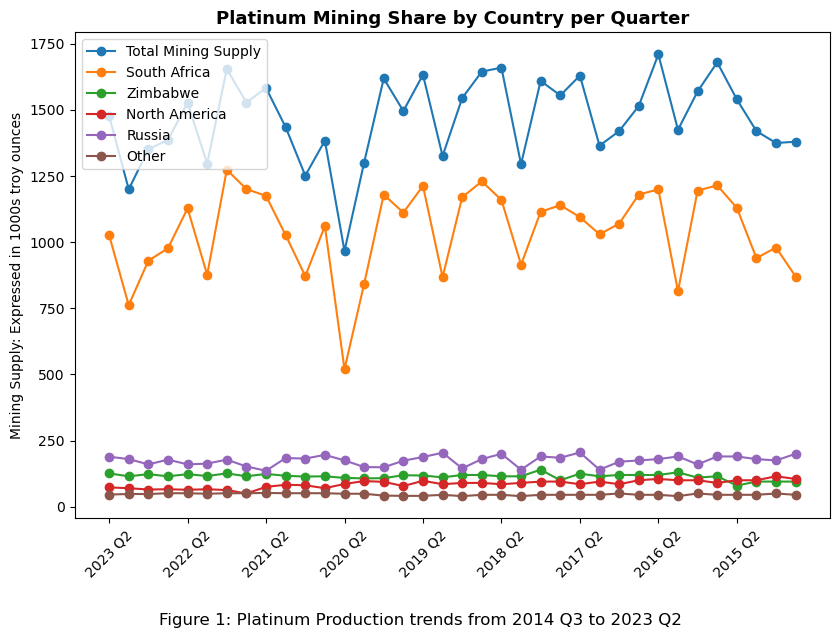

In [25]:
#Set the 'DESCRIPTION' column as the main label for rows:
# Create a new DataFrame by copying the original
new_psuppdem = psuppdem.copy()

# Set 'DESCRIPTION' as the index for the new DataFrame
new_psuppdem.set_index('DESCRIPTION', inplace=True)

#Swap the rows and columns of the dataframe:

new_psuppdem = new_psuppdem.T

#Line plot visualizing the platinum mining supply by country:

plt.figure(figsize=(8.5,6))
for country in new_psuppdem.columns:
    plt.plot(new_psuppdem.index, new_psuppdem[country], label=country, marker='o')
    
#Some aesthetics: 
    
plt.legend(loc='upper left')
plt.title('Platinum Mining Share by Country per Quarter', fontsize=13, fontweight='bold')
plt.xticks(rotation=45) #Rotate the x-axis labels by 45 degrees
plt.xticks(new_psuppdem.index[::4]) #Select every 4th item (to reduce overlapping)
plt.xlabel('') #Remove x-axis label
plt.ylabel('Mining Supply: Expressed in 1000s troy ounces')
plt.tight_layout()
plt.figtext(0.5, -0.05,"Figure 1: Platinum Production trends from 2014 Q3 to 2023 Q2",ha="center", fontsize=12, wrap=True) #Caption
plt.show()

#### · Demand Share by Sector

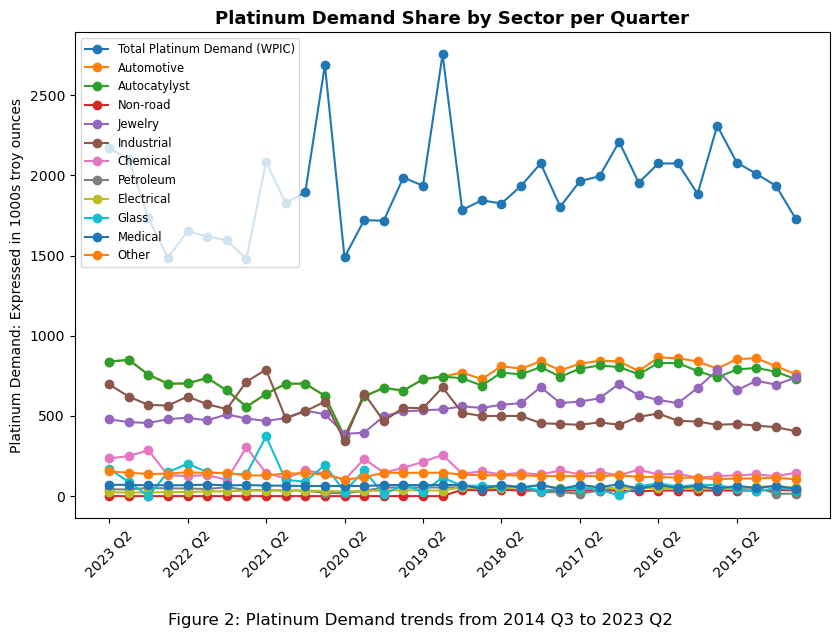

In [26]:
demand_values = ['Total Platinum Demand (WPIC)', 'Automotive', 'Autocatylyst','Non-road','Jewelry','Industrial','Chemical',
                'Petroleum','Electrical','Glass','Medical','Other']

# Selecting rows
demand_sectors = psuppdemfull[psuppdemfull['DESCRIPTION'].isin(demand_values)]
demand_sectors = demand_sectors.drop(demand_sectors.index[:3]) #Drop the first three rows (repeated)

# Set 'DESCRIPTION' as the index for the new DataFrame
demand_sectors.set_index('DESCRIPTION', inplace=True)

#Swap the rows and columns of the dataframe:

demand_sectors = demand_sectors.T

#Line plot visualizing the platinum demand by sector:

plt.figure(figsize=(8.5,6))
for sector in demand_sectors.columns:
    plt.plot(demand_sectors.index, demand_sectors[sector], label=sector, marker='o')
    
#Some aesthetics: 
    
plt.legend(loc='upper left', fontsize='small') 
plt.title('Platinum Demand Share by Sector per Quarter', fontsize=13, fontweight='bold')
plt.xticks(rotation=45) #Rotate the x-axis labels by 45 degrees
plt.xticks(demand_sectors.index[::4]) #Select every 4th item (to reduce overlapping)
plt.xlabel('') #Remove x-axis label
plt.ylabel('Platinum Demand: Expressed in 1000s troy ounces')
plt.tight_layout()
plt.figtext(0.5, -0.05,"Figure 2: Platinum Demand trends from 2014 Q3 to 2023 Q2",ha="center", fontsize=12, wrap=True) #Caption
plt.show()

### • Further Data Analysis

## 2.1)   Relationship Between Production Patterns and Platinum Prices

#### · Data wrangling

In [38]:
#Quarterly Platinum Production worlwide:

#Subset including just the quarterly production worlwide 

psuppdem_world = psuppdem[psuppdem['DESCRIPTION'] == 'Total Mining Supply'].copy()

#Reshape this dataframe to have one row per time period: 

psuppdem_world_melted = pd.melt(psuppdem_world, id_vars='DESCRIPTION', var_name='Date', value_name='Production')

#psuppdem_world_melted.dtypes to check the data type of the columns

#To convert 'Date' column data type to a date object and replace the yyyy Qx:

def convert_quarter_to_datetime(quarter_str):
    year, qtr = quarter_str.split(' Q')
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}[qtr]
    return pd.to_datetime(f"{year}-{month}-01")

psuppdem_world_melted['Date'] = psuppdem_world_melted['Date'].apply(convert_quarter_to_datetime)

psuppdem_world_melted.sort_values(by='Date', ascending=True, inplace=True) #Date in ascending order

psuppdem_world_melted_reset = psuppdem_world_melted.reset_index(drop=True) #Reset index (VERY IMPORTANT)

#Platinum Prices:

#To convert 'DATE' column data type to a date object:
pprices['DATE'] = pd.to_datetime(pprices['DATE'])

#To resample data into quarterly bins: 
pprices.set_index('DATE', inplace=True)
pprices = pprices['AVG_PRICE'].resample('Q').mean()

#Turn the datetime index back into a column:
pprices = pprices.reset_index()
pprices.columns = ['DATE', 'AVG_PRICE']

#Dataframe containing Production and Price
new_df = pd.DataFrame({
    'Production': psuppdem_world_melted_reset['Production'],
    'Price': pprices['AVG_PRICE']
})

#### · Correlation and Lagged Correlations

Evaluate how world platinum production at time t might influence platinum price at times t+1, t+2 and t+3:

In [39]:
def compute_lagged_correlations(df, max_lag):
    
    correlations = []
    
    # Compute and store the correlation at lag 0
    correlations.append((0, df['Production'].corr(df['Price'])))
    
    for lag in range(1, max_lag + 1):
        # Create a lagged production column
        df[f'LaggedProduction_{lag}'] = df['Production'].shift(-lag)  # Note the negative sign
        
        # Compute the correlation between 'Price' and the new lagged production column
        corr = df['Price'].corr(df[f'LaggedProduction_{lag}'])
        
        # Append the lag number and computed correlation to the correlations list
        correlations.append((lag, corr))
        
    # Convert the correlations list into a dataframe
    corr_df = pd.DataFrame(correlations, columns=['Lag', 'Correlation'])
    
    return corr_df

max_lag = 3 #Maximum number of lags
correlation_results = compute_lagged_correlations(new_df, max_lag)


print(correlation_results)

   Lag  Correlation
0    0     0.003806
1    1     0.098599
2    2     0.185138
3    3     0.205595


#### · Regression Analysis

In this analysis, we explore the relationship between world platinum production and platinum price using linear regression. 

We assess the impact of current production and production from previous time periods (lagged production) on platinum prices. 

Specifically:

Current Production: Assessing its immediate impact on prices.
Lagged Productions (1, 2, & 3): Evaluating how past production values influence current prices.
Through this, we aim to uncover the immediate and delayed effects of production shifts on platinum pricing.

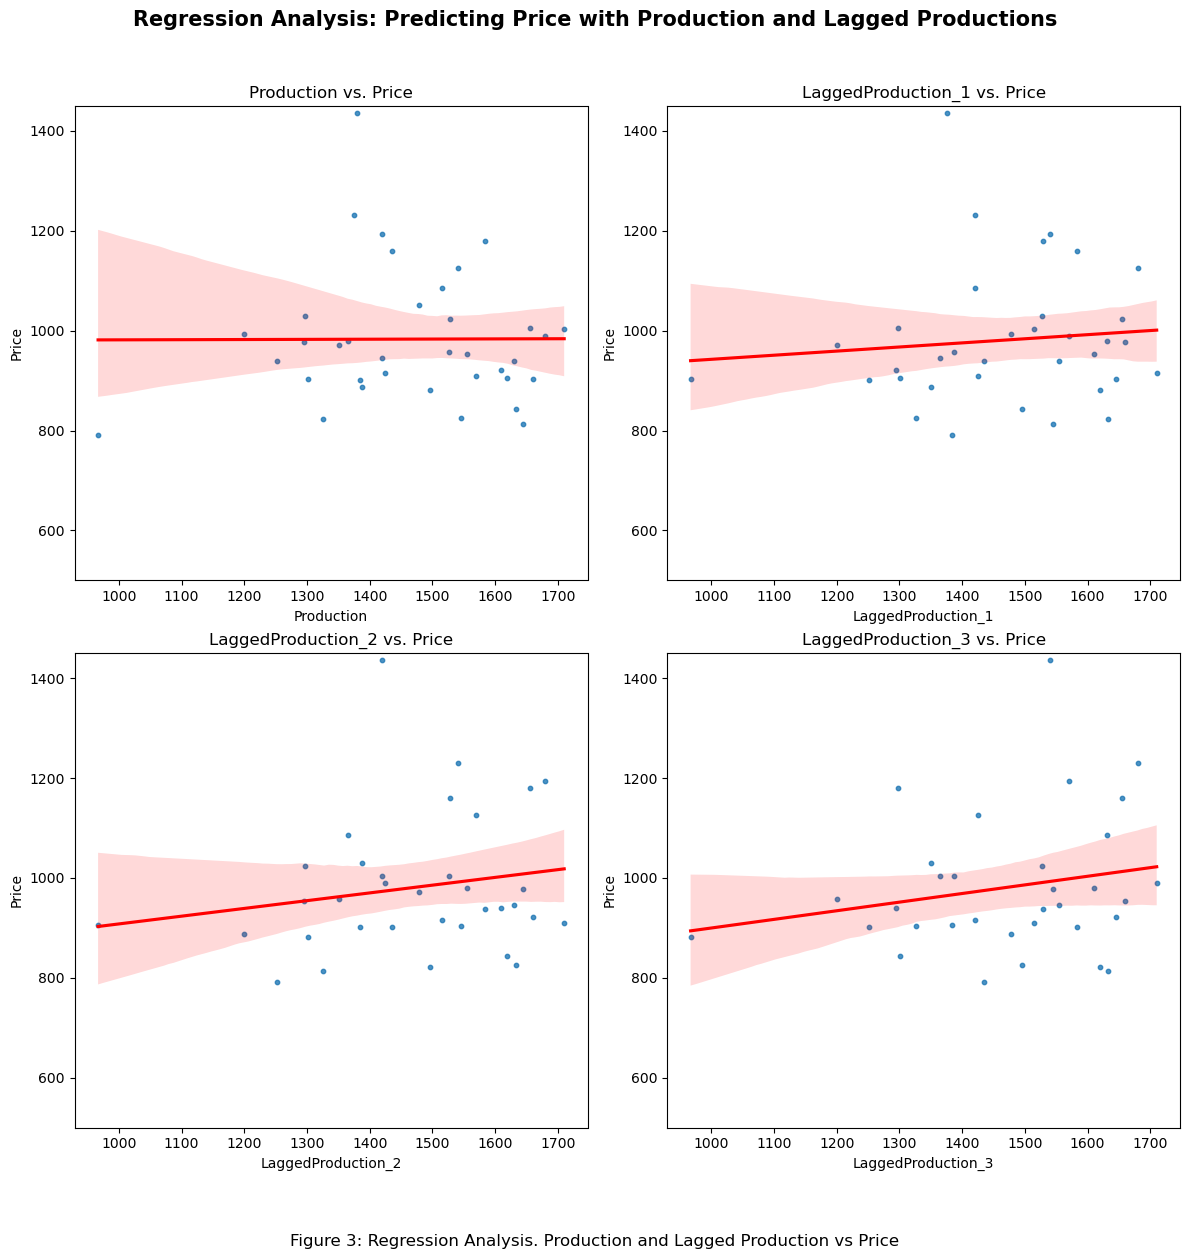

In [40]:
#Now the dataframe filtered_df contains data about production, price and production lagged

fig, axs = plt.subplots(2, 2, figsize=(12, 12))  

# List of predictor variables
predictors = ['Production', 'LaggedProduction_1', 'LaggedProduction_2', 'LaggedProduction_3']

# Titles for each subplot
titles = ['Production vs. Price', 'LaggedProduction_1 vs. Price', 
          'LaggedProduction_2 vs. Price', 'LaggedProduction_3 vs. Price']

# Create a 2x2 grid of subplots
for i in range(2):
    for j in range(2):
        ax = axs[i, j]
        predictor = predictors[i*2 + j]
        title = titles[i*2 + j]
        
        # Plotting the linear regression plot
        sns.regplot(x=predictor, y='Price', data=new_df, ax=ax, 
                    scatter_kws={'s':10}, line_kws={'color':'red'})
        
        ax.set_title(title)
        ax.set_xlabel(predictor)
        ax.set_ylabel('Price')
        ax.set_ylim([500, 1450])

plt.tight_layout()
plt.suptitle('Regression Analysis: Predicting Price with Production and Lagged Productions', 
             fontsize=15, fontweight='bold')
plt.subplots_adjust(top=0.9)
plt.figtext(0.5, -0.05,"Figure 3: Regression Analysis. Production and Lagged Production vs Price",ha="center", fontsize=12, wrap=True) #Caption
plt.show()

## 2.2) Relationship Between Demand Patterns and Platinum Prices 

#### · Data wrangling

In [41]:
#Total demand of platinum:

#Subset including just the total demand of platinum 

psuppdem_dem = psuppdemfull[psuppdemfull['DESCRIPTION'] == 'Total Platinum Demand (WPIC)'].copy() 

#Reshape this dataframe to have one row per time period: 

psuppdem_dem_melted = pd.melt(psuppdem_dem, id_vars='DESCRIPTION', var_name='Date', value_name='Demand')

#psuppdem_dem_melted.dtypes to check the data type of the columns

#To convert 'Date' column data type to a date object and replace the yyyy Qx:

def convert_quarter_to_datetime(quarter_str):
    year, qtr = quarter_str.split(' Q')
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}[qtr]
    return pd.to_datetime(f"{year}-{month}-01")

psuppdem_dem_melted['Date'] = psuppdem_dem_melted['Date'].apply(convert_quarter_to_datetime)

psuppdem_dem_melted.sort_values(by='Date', ascending=True, inplace=True) #Date in ascending order

psuppdem_dem_melted_reset = psuppdem_dem_melted.reset_index(drop=True) #Reset index (VERY IMPORTANT)

#Dataframe containing Demand and Price
new_df2 = pd.DataFrame({
    'Demand': psuppdem_dem_melted_reset['Demand'],
    'Price': pprices['AVG_PRICE']
})

#### · Correlation and Lagged Correlations

Evaluate how platinum demand at time t might influence platinum price at times t+1, t+2 and t+3:

In [42]:
def compute_lagged_correlations(df, max_lag):
    
    correlations = []
    
    # Compute and store the correlation at lag 0
    correlations.append((0, df['Demand'].corr(df['Price'])))
    
    for lag in range(1, max_lag + 1):
        # Create a lagged production column
        df[f'LaggedDemand_{lag}'] = df['Demand'].shift(-lag)  # Note the negative sign
        
        # Compute the correlation between 'Price' and the new lagged production column
        corr = df['Price'].corr(df[f'LaggedDemand_{lag}'])
        
        # Append the lag number and computed correlation to the correlations list
        correlations.append((lag, corr))
        
    # Convert the correlations list into a dataframe
    corr_df = pd.DataFrame(correlations, columns=['Lag', 'Correlation'])
    
    return corr_df

max_lag = 3 #Maximum number of lags
correlation_results2 = compute_lagged_correlations(new_df2, max_lag)


print(correlation_results2)

   Lag  Correlation
0    0    -0.046104
1    1    -0.093378
2    2    -0.121328
3    3    -0.001740


#### · Regression Analysis

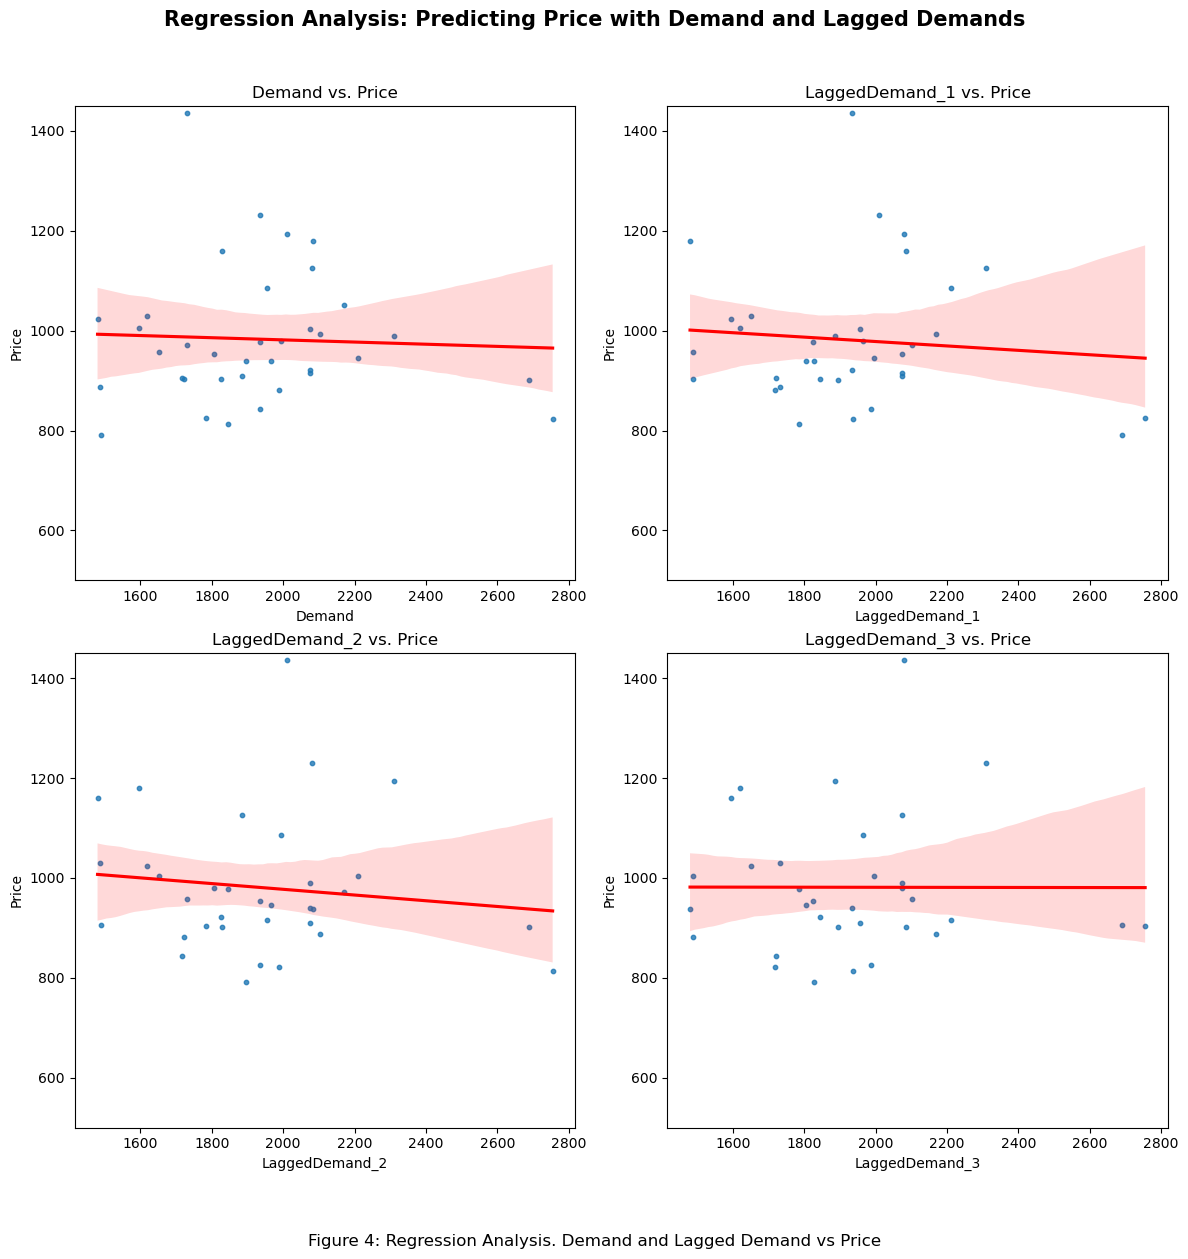

In [43]:
#Now the dataframe new_df2 contains data about production, price and production lagged

fig, axs = plt.subplots(2, 2, figsize=(12, 12))  

# List of predictor variables
predictors2 = ['Demand', 'LaggedDemand_1', 'LaggedDemand_2', 'LaggedDemand_3']

# Titles for each subplot
titles2 = ['Demand vs. Price', 'LaggedDemand_1 vs. Price', 
          'LaggedDemand_2 vs. Price', 'LaggedDemand_3 vs. Price']

# Create a 2x2 grid of subplots
for i in range(2):
    for j in range(2):
        ax = axs[i, j]
        predictor = predictors2[i*2 + j]
        title = titles2[i*2 + j]
        
        # Plotting the linear regression plot
        sns.regplot(x=predictor, y='Price', data=new_df2, ax=ax, 
                    scatter_kws={'s':10}, line_kws={'color':'red'})
        
        ax.set_title(title)
        ax.set_xlabel(predictor)
        ax.set_ylabel('Price')
        ax.set_ylim([500, 1450])

plt.tight_layout()
plt.suptitle('Regression Analysis: Predicting Price with Demand and Lagged Demands', 
             fontsize=15, fontweight='bold')
plt.subplots_adjust(top=0.9)
plt.figtext(0.5, -0.05,"Figure 4: Regression Analysis. Demand and Lagged Demand vs Price",ha="center", fontsize=12, wrap=True) #Caption
plt.show()

## 2.3) Multivariate Analysis (Exploring Joint Impact without Interaction)

#### · Multivariate Regression Analysis (without interaction)

In [44]:
import statsmodels.api as sm ; import numpy as np

In [45]:
#Create a dataframe containing the dependent variable and the explanatory variables of every regression

dfp = pd.DataFrame({'Price': pprices['AVG_PRICE']})
dfpr = new_df[['Production', 'LaggedProduction_1', 'LaggedProduction_2','LaggedProduction_3']]
dfd = new_df2[['Demand', 'LaggedDemand_1', 'LaggedDemand_2','LaggedDemand_3']]
multivariate_df = pd.concat([dfp, dfpr, dfd], axis=1) 

# Define the dependent variable
dependent_var = 'Price'

multivariate_df.fillna(multivariate_df.mean(), inplace=True)  # Replace NaN with mean of the column

# Define sets of independent variables to be used in separate models
independent_var_sets = [
    ['Production', 'Demand'],
    ['LaggedProduction_1', 'LaggedDemand_1'],
    ['LaggedProduction_2', 'LaggedDemand_2'],
    ['LaggedProduction_3', 'LaggedDemand_3']
]

# Loop through each set of independent variables, fit a model, and print a summary
for i, var_set in enumerate(independent_var_sets):
    X = sm.add_constant(multivariate_df[var_set])  # add a constant to the model
    Y = multivariate_df[dependent_var]
    
    model = sm.OLS(Y, X).fit()
    
    print(f"\nModel {i+1} Summary (Dependent variable: Price, Independent variables: {', '.join(var_set)}):\n")
    print(model.summary())


Model 1 Summary (Dependent variable: Price, Independent variables: Production, Demand):

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.058
Method:                 Least Squares   F-statistic:                   0.03599
Date:                Mon, 09 Oct 2023   Prob (F-statistic):              0.965
Time:                        17:28:06   Log-Likelihood:                -226.69
No. Observations:                  36   AIC:                             459.4
Df Residuals:                      33   BIC:                             464.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Interpretation of results:

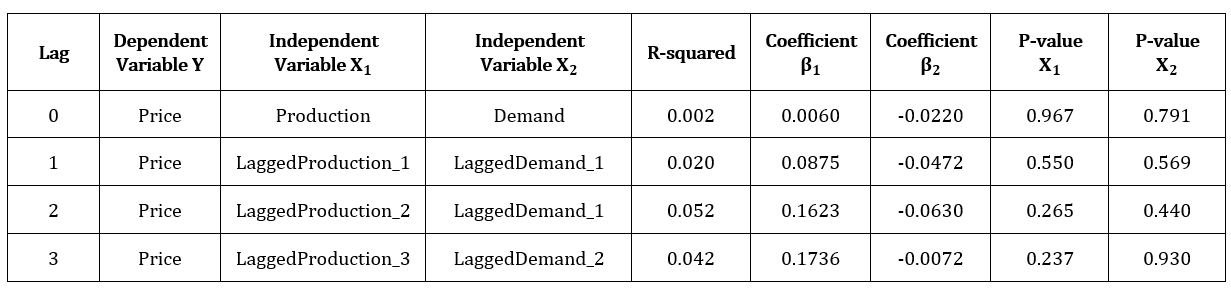

In the conducted analyses across four distinct multiple regression models, each model persistently exhibited a remarkably low R-squared value, accompanied by notably high p-values for the independent variables. 

The consistently low R-squared values, across all models, show that the independent variables under investigation whether they be production, demand, or their respective lagged values do not significantly explain the variation observed in the dependent variable, price. 

Moreover, the high p-values for each independent variable prove that we fail to reject the null hypothesis, thereby indicating that these predictors are not statistically significant in forecasting price. 

This lack of statistical significance and explanatory power states that the current models may not be enough to capture the underlying relationships within the data. 

Consequently, this paves the way for a comprehensive reevaluation of the chosen modeling approach. It is plausible that introducing additional explanatory variables, considering non-linear relationships, or exploring alternative statistical methods might offer enhanced insights and fortify the predictive capability of the subsequent models developed.

## 2.4) Multivariate Analysis (Exploring Interaction Effect)

#### · Multivariate Regression Analysis (with interaction)

In [46]:
# Define the dependent variable
dependent_var = 'Price'

multivariate_df.fillna(multivariate_df.mean(), inplace=True)  # Replace NaN with mean of the column

# Define sets of independent variables to be used in separate models
independent_var_sets = [
    ['Production', 'Demand'],
    ['LaggedProduction_1', 'LaggedDemand_1'],
    ['LaggedProduction_2', 'LaggedDemand_2'],
    ['LaggedProduction_3', 'LaggedDemand_3']
]

# Loop through each set of independent variables, fit a model, and print a summary
for i, var_set in enumerate(independent_var_sets):
    
    # Creating interaction term (Product of the independent variables)
    multivariate_df['Interaction'] = multivariate_df[var_set[0]] * multivariate_df[var_set[1]]
    
    # Adding interaction term to the variable set
    var_set_with_interaction = var_set + ['Interaction']
    
    X = sm.add_constant(multivariate_df[var_set_with_interaction])  # add a constant to the model
    Y = multivariate_df[dependent_var]
    
    model = sm.OLS(Y, X).fit()
    
    print(f"\nModel {i+1} Summary (Dependent variable: Price, Independent variables: {', '.join(var_set_with_interaction)}):\n")
    print(model.summary())


Model 1 Summary (Dependent variable: Price, Independent variables: Production, Demand, Interaction):

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.090
Method:                 Least Squares   F-statistic:                   0.03559
Date:                Mon, 09 Oct 2023   Prob (F-statistic):              0.991
Time:                        17:28:07   Log-Likelihood:                -226.67
No. Observations:                  36   AIC:                             461.3
Df Residuals:                      32   BIC:                             467.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

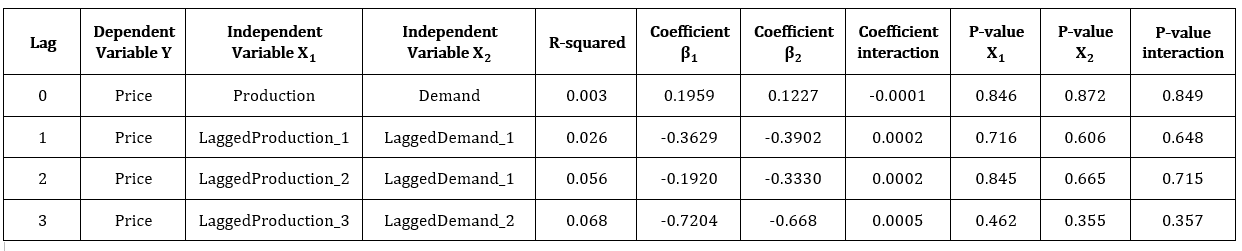

In the latest analyses, an interaction term was introduced in an attempt to capture potential synergistic effects between independent variables in predicting the dependent variable, price. Nonetheless, across all models, including those that explored interaction effects, a persistent theme is evident: strikingly low R-squared values and remarkably high p-values for the independent variables.

The uniformly low R-squared values, apparent across all iterations of the model, signal that neither the primary independent variables (such as production and demand nor their lagged variants) nor their interactions substantially explain the fluctuations observed in price.

Simultaneously, the elevated p-values affiliated with each independent variable underscore our inability to reject the null hypothesis, implying that these predictor variables, even when interacting, do not statistically significantly forecast price variations.

This consistent lack of statistical significance and explanatory potency calls the aptness of the current modeling strategies into question and mandates a thorough reassessment of the modeling framework. A strategic exploration involving the integration of additional explanatory variables, contemplating non-linear associations, or deploying alternative statistical methodologies might pave the way towards models with bolstered predictive accuracy and more robust insights into the intricate relationships embedded within the data.



## 2.5) Time Series Analysis

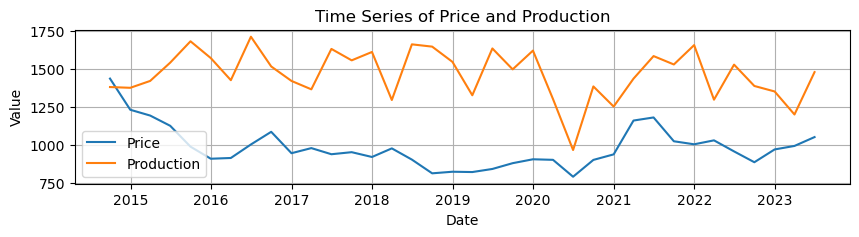

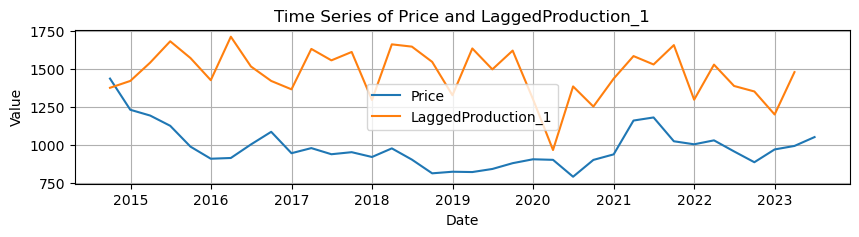

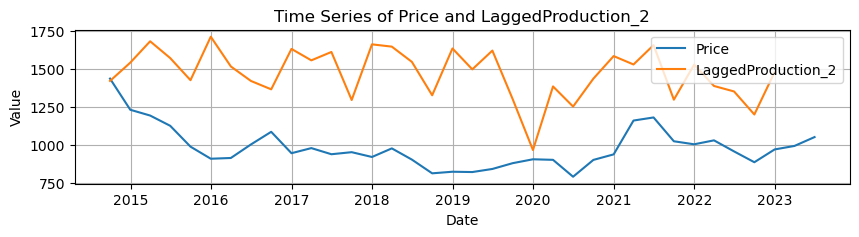

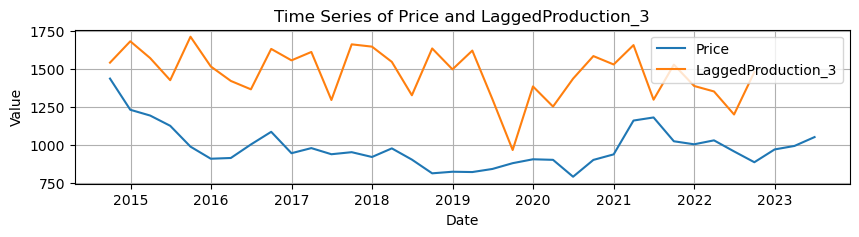

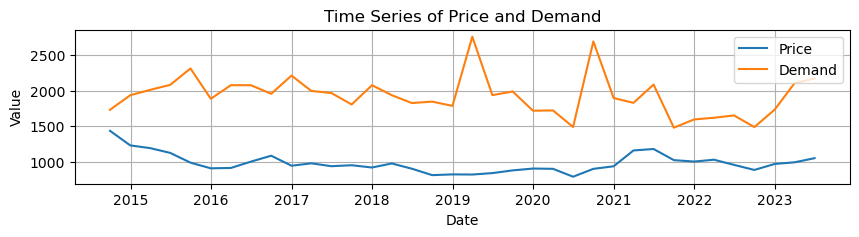

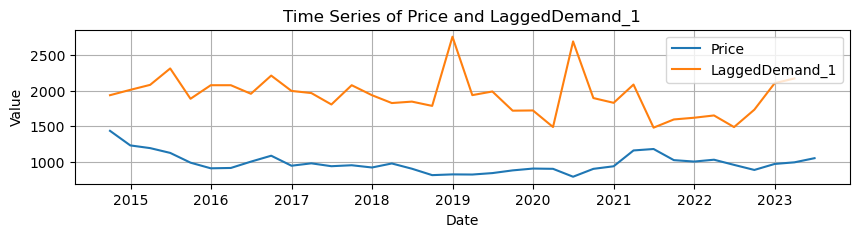

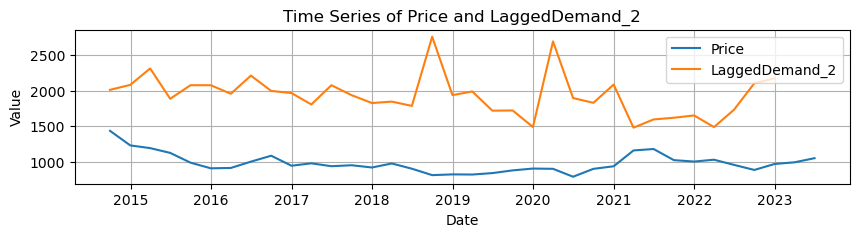

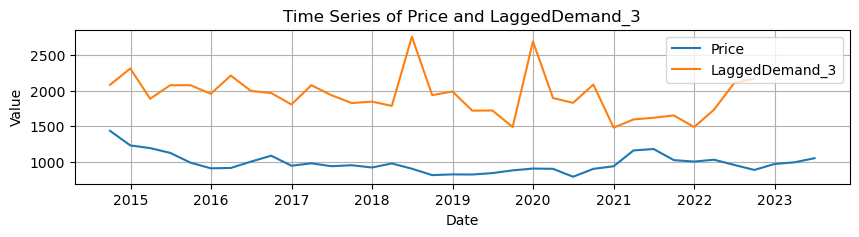

In [47]:
#Define a new dataframe:

merged_data = pd.merge(pprices, new_df, how='inner', left_on='AVG_PRICE', right_on='Price')

# Then, merge the result with new_df2
data_time_series = pd.merge(merged_data, new_df2, how='inner', left_on='AVG_PRICE', right_on='Price')

# Drop the unwanted columns
data_time_series = data_time_series.drop(['Price_x', 'Price_y'], axis=1)

#Time series plots

# List of columns to plot against AVG_PRICE
columns_to_plot = ['Production', 'LaggedProduction_1', 'LaggedProduction_2', 'LaggedProduction_3', 
                   'Demand', 'LaggedDemand_1', 'LaggedDemand_2','LaggedDemand_3']

# Loop through each column to create a separate plot with AVG_PRICE
for col in columns_to_plot:
    plt.figure(figsize=(10, 2))  # Set the figure size
    plt.plot(data_time_series['DATE'], data_time_series['AVG_PRICE'], label='Price')  # Change label to 'Price'
    plt.plot(data_time_series['DATE'], data_time_series[col], label=col)
    plt.title(f'Time Series of Price and {col}')
    plt.xlabel('Date')  # Label for the x-axis
    plt.ylabel('Value')  # Label for the y-axis
    plt.legend()
    plt.grid(True)
    plt.show()